In [1]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ImportError: No module named _tkinter, please install the python-tk package

In [3]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Lambda

Using TensorFlow backend.


In [4]:
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import OneHotEncoder

In [7]:
data = pd.read_csv('../data/train.csv', chunksize=10000)

In [58]:
# pd.set_option('display.height', 1000)
# pd.set_option('display.max_rows', 10)
# pd.set_option('display.max_columns', 5)
# pd.set_option('display.width', 1000)

In [9]:
data = data.get_chunk()

In [12]:
data.shape

(10000, 6)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [15]:
n_samples = len(data)
n_pos = sum(data['is_dub'] == 1)
n_neg = n_samples - n_pos

In [60]:
data.head()

,id,qid1,...,question2,is_duplicate
0,0,1,...,What is the step by step guide to invest in sh...,0
1,1,3,...,What would happen if the Indian government sto...,0
2,2,5,...,How can Internet speed be increased by hacking...,0
3,3,7,...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,...,Which fish would survive in salt water?,0


In [61]:
data[['question2', 'question1']][:10].values

array([['What is the step by step guide to invest in share market?',
        'What is the step by step guide to invest in share market in india?'],
       [ 'What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?',
        'What is the story of Kohinoor (Koh-i-Noor) Diamond?'],
       ['How can Internet speed be increased by hacking through DNS?',
        'How can I increase the speed of my internet connection while using a VPN?'],
       ['Find the remainder when [math]23^{24}[/math] is divided by 24,23?',
        'Why am I mentally very lonely? How can I solve it?'],
       ['Which fish would survive in salt water?',
        'Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?'],
       [ "I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",
        'Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?'],
       ['What keeps childern active and far from

In [62]:
data[data['is_duplicate'] == 1][['question1', 'question2']][:10].values

array([[ 'Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?',
        "I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?"],
       ['How can I be a good geologist?',
        'What should I do to be a great geologist?'],
       ['How do I read and find my YouTube comments?',
        'How can I see all my Youtube comments?'],
       ['What can make Physics easy to learn?',
        'How can you make physics easy to learn?'],
       ['What was your first sexual experience like?',
        'What was your first sexual experience?'],
       [ 'What would a Trump presidency mean for current international master’s students on an F1 visa?',
        'How will a Trump presidency affect the students presently in US or planning to study in US?'],
       ['What does manipulation mean?', 'What does manipulation means?'],
       [ 'Why are so many Quora users posting questions that are readily answered on Google?',
        'Wh

In [63]:
data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [13]:
# rename columns 
data.columns = ['id', 'qid1', 'qid2', 'q1', 'q2', 'is_dub']

In [21]:
# convert all  floats to sgtring

data['q1'] = data['q1'].astype(str)
data['q2'] = data['q2'].astype(str)


In [66]:
data['q1_len'] = data['q1'].str.split().apply(len)
data['q2_len'] = data['q2'].str.split().apply(len)

In [72]:
# find the the distribution of similar words and similar meaning 
# does syntax carry intent?

data['diff_words'] = data.apply(lambda x: set(x['q1'].split())
           .symmetric_difference(x['q2'].split()), axis=1)

data['sim_words'] = data.apply(lambda x: set(x['q1'].split())
           .intersection(x['q2'].split()), axis=1)

In [79]:
data[data['is_dub'] == 1]['sim_words']

5                {and, does, about, Capricorn, me?, a, say}
7                                    {geologist?, I, a, be}
11                                  {comments?, my, How, I}
12                            {learn?, easy, can, to, make}
13                         {was, first, sexual, What, your}
                                ...                        
404280    {party?, frat, some, are, wear, ideas, outfit,...
404281                 {and, is, Manaphy, the, in, of, Why}
404282                                {distance, long, How}
404284                    {Jainism, about, say, What, does}
404286                     {is, there, death?, after, life}
Name: sim_words, dtype: object

In [84]:
data['final_word'] = data[["q1", "q2"]]\
    .apply(lambda x: (x["q1"].split()[-1], x["q2"].split()[-1]), axis=1)


In [95]:
data["final_word_same"] = \
    data['final_word'].apply(lambda x: x[0] == x[1])

In [ ]:
last_word_dub_mask = \
    (data['is_dub'] ==1) & (data['final_word_same'] == True)
    

In [102]:
data[last_word_dub_mask].head()

,id,qid1,...,final_word,final_word_same
5,5,11,...,"(me?, me?)",True
7,7,15,...,"(geologist?, geologist?)",True
11,11,23,...,"(comments?, comments?)",True
12,12,25,...,"(learn?, learn?)",True
18,18,37,...,"(Google?, Google?)",True


In [103]:
len(data[last_word_dub_mask]) / n_samples

0.16908902025773578

In [ ]:
# find the longest matching substring 

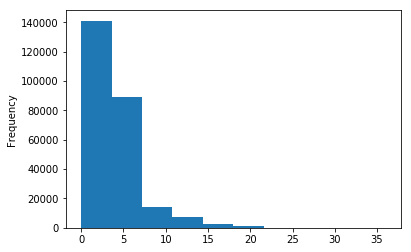

In [106]:
data[data['is_dub'] == 0]['sim_words'].apply(len).plot('hist')

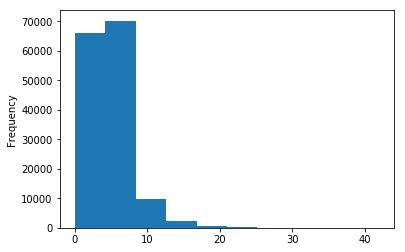

In [107]:
data[data['is_dub'] == 1]['sim_words'].apply(len).plot('hist')

In [128]:
import time

In [63]:
from datetime import datetime

In [65]:
datetime.now().isoformat()

'2017-03-22T23:38:18.256839'

In [149]:
from keras.preprocessing import sequence

In [17]:
tkn = TweetTokenizer().tokenize

In [31]:
X_tok = data['q1'].apply(str.lower).apply(tkn)


In [80]:
toks = data[['q1', 'q2']]\
    .apply(lambda x: (tkn(x['q1']), tkn(x['q2'])), axis=1)

In [81]:
toks[1]

(['What',
  'is',
  'the',
  'story',
  'of',
  'Kohinoor',
  '(',
  'Koh-i-Noor',
  ')',
  'Diamond',
  '?'],
 ['What',
  'would',
  'happen',
  'if',
  'the',
  'Indian',
  'government',
  'stole',
  'the',
  'Kohinoor',
  '(',
  'Koh-i-Noor',
  ')',
  'diamond',
  'back',
  '?'])

In [73]:
from keras.preprocessing.sequence import pad_sequences

In [33]:
words = set(s for sent in X_tok  for s in sent)

word_indx = {e : i+1 for (i, e) in enumerate(words)}
indx_word = {i+1 : e for (i, e) in enumerate(words)} 

In [38]:
words_vec = [[word_indx[w] for w in sent] for sent in X_tok]

In [40]:
X_q1 = pad_sequences(words_vec, maxlen=100)

array([[    0,     0,     0, ...,  2496,  4709,  1099],
       [    0,     0,     0, ...,  1611,  1102,  1099],
       [    0,     0,     0, ...,  3937,  6485,  1099],
       ..., 
       [    0,     0,     0, ...,  6870,  7686,  1099],
       [    0,     0,     0, ..., 12111,  6422,  1099],
       [    0,     0,     0, ...,  5703, 10417,  1099]], dtype=int32)

In [41]:
enc = OneHotEncoder()

In [51]:
_y = enc.fit_transform(data['is_dub'].values.reshape(-1, 1))

In [61]:
_y.toarray()

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [2]:
data.

NameError: name 'Y' is not defined